In [ ]:
import numpy as np

def generate_initial_state(N):
    return np.random.choice([-1, 1], size=(N, N))

def generate_proposal_state(X, beta):
    N = X.shape[0]
    i, j = np.random.randint(0, N, size=2)
    Y = X.copy()
    Y[i, j] = -Y[i, j]  # Flip the spin at (i, j)
    return Y

def compute_acceptance_probability(X, Y, beta):
    delta_E = 2 * X * (Y - X)
    return np.exp(-beta * delta_E.sum())

def simulate_ising_model(N, beta, T):
    history = []  # List to store the system states over time
    
    # Initialization
    X = generate_initial_state(N)
    history.append(X.copy())
    
    # Forward CFTP
    for t in range(1, T+1):
        Y = generate_proposal_state(X, beta)
        p = compute_acceptance_probability(X, Y, beta)
        u = np.random.uniform()
        
        if u <= p:
            X = Y.copy()
            
        history.append(X.copy())
    
    # Backward CFTP
    for t in range(T-1, 0, -1):
        Y = generate_proposal_state(X, beta)
        p = compute_acceptance_probability(X, Y, beta)
        u = np.random.uniform()
        
        if u <= p:
            X = Y.copy()
            
        history.append(X.copy())
    
    return history

# Example usage
N = 10  # Size of the lattice
beta = 0.5  # Inverse temperature
T = 1000  # Number of time steps

history = simulate_ising_model(N, beta, T)

# Print the system states at different time steps
for t, state in enumerate(history):
    print(f"Time step {t}:")
    print(state)
    print("-----------")

Time step 0:
[[-1 -1 -1 -1  1 -1  1 -1  1 -1]
 [-1  1 -1  1  1  1 -1 -1  1 -1]
 [ 1 -1  1  1 -1  1  1  1  1 -1]
 [ 1  1  1  1  1 -1 -1 -1  1  1]
 [-1  1  1 -1  1 -1 -1  1 -1 -1]
 [-1  1  1 -1 -1  1 -1  1  1 -1]
 [ 1 -1 -1  1  1 -1 -1 -1 -1 -1]
 [-1  1  1  1  1  1 -1 -1 -1 -1]
 [ 1 -1 -1 -1 -1  1  1 -1  1 -1]
 [-1  1  1 -1  1  1  1 -1  1 -1]]
-----------
Time step 1:
[[-1 -1 -1 -1  1 -1  1 -1  1 -1]
 [-1  1 -1  1  1  1 -1 -1  1 -1]
 [ 1 -1  1  1 -1  1  1 -1  1 -1]
 [ 1  1  1  1  1 -1 -1 -1  1  1]
 [-1  1  1 -1  1 -1 -1  1 -1 -1]
 [-1  1  1 -1 -1  1 -1  1  1 -1]
 [ 1 -1 -1  1  1 -1 -1 -1 -1 -1]
 [-1  1  1  1  1  1 -1 -1 -1 -1]
 [ 1 -1 -1 -1 -1  1  1 -1  1 -1]
 [-1  1  1 -1  1  1  1 -1  1 -1]]
-----------
Time step 2:
[[-1 -1 -1 -1  1 -1  1 -1  1 -1]
 [-1  1 -1  1  1  1 -1 -1  1 -1]
 [ 1 -1  1  1 -1  1  1 -1  1 -1]
 [ 1  1  1  1  1 -1 -1 -1  1  1]
 [ 1  1  1 -1  1 -1 -1  1 -1 -1]
 [-1  1  1 -1 -1  1 -1  1  1 -1]
 [ 1 -1 -1  1  1 -1 -1 -1 -1 -1]
 [-1  1  1  1  1  1 -1 -1 -1 -1]
 [ 1 -1 -1 

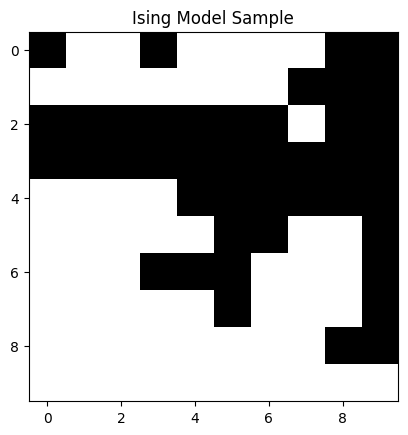

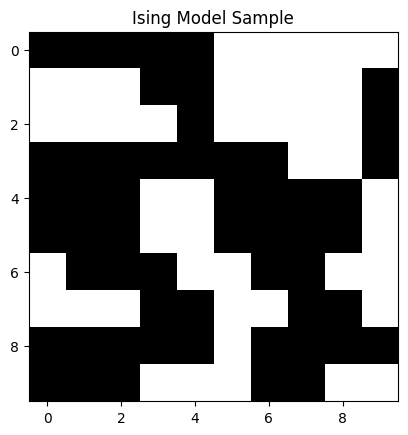

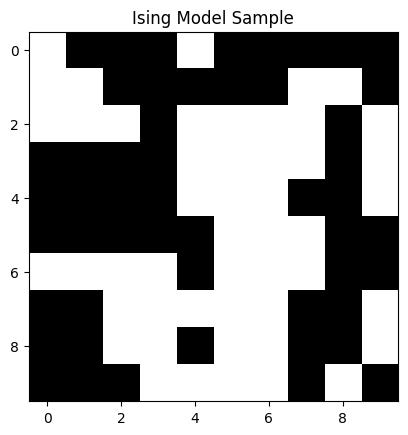

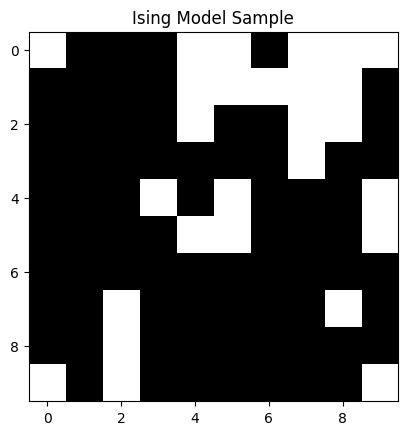

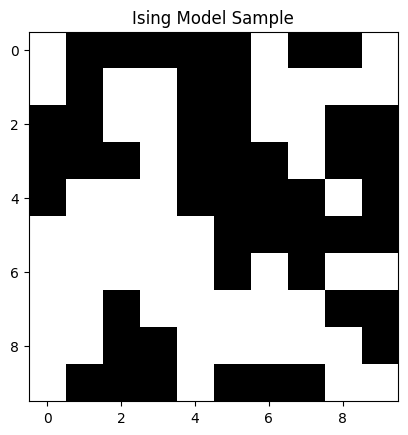

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate the energy of the Ising model
def calculate_energy(spins, J):
    energy = 0
    for i in range(len(spins)):
        for j in range(len(spins)):
            energy += -J * spins[i, j] * (spins[(i + 1) % len(spins), j] + spins[i, (j + 1) % len(spins)])
    return energy

# Function to perform a Metropolis-Hastings step
def metropolis_hastings_step(spins, J, beta):
    i, j = np.random.randint(len(spins)), np.random.randint(len(spins))
    delta_energy = 2 * J * spins[i, j] * (spins[(i - 1) % len(spins), j] + spins[(i + 1) % len(spins), j]
                                         + spins[i, (j - 1) % len(spins)] + spins[i, (j + 1) % len(spins)])
    if delta_energy < 0 or np.random.uniform() < np.exp(-beta * delta_energy):
        spins[i, j] *= -1

# Function to perform the CFTP algorithm
def cftp_ising_model(size, J, temperature, num_samples):
    samples = []
    for _ in range(num_samples):
        spins = np.random.choice([-1, 1], size=(size, size))
        beta = 1 / temperature

        # Generate a sample by performing Metropolis-Hastings steps
        for _ in range(size ** 2):
            metropolis_hastings_step(spins, J, beta)

        samples.append(spins)

        # Create visualizations of the samples
        plt.imshow(spins, cmap='gray', vmin=-1, vmax=1)
        plt.title('Ising Model Sample')
        plt.show()

    return samples

# Parameters
size = 10       # Size of the Ising model grid
J = 1           # Interaction strength
temperature = 2 # Temperature
num_samples = 5 # Number of samples to generate

# Run the CFTP Ising model simulation
samples = cftp_ising_model(size, J, temperature, num_samples)